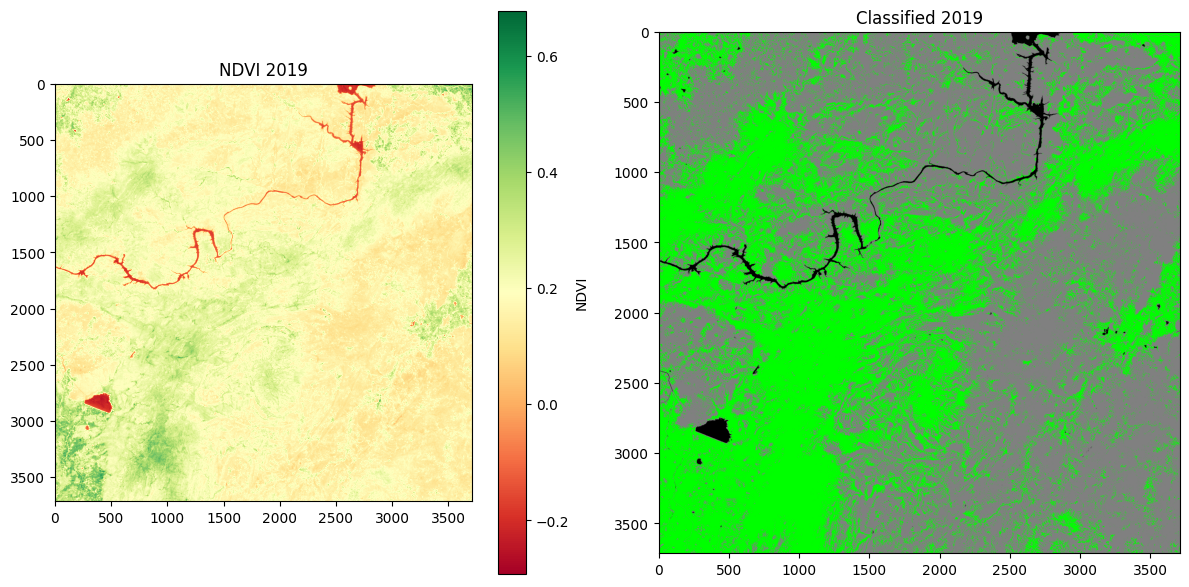

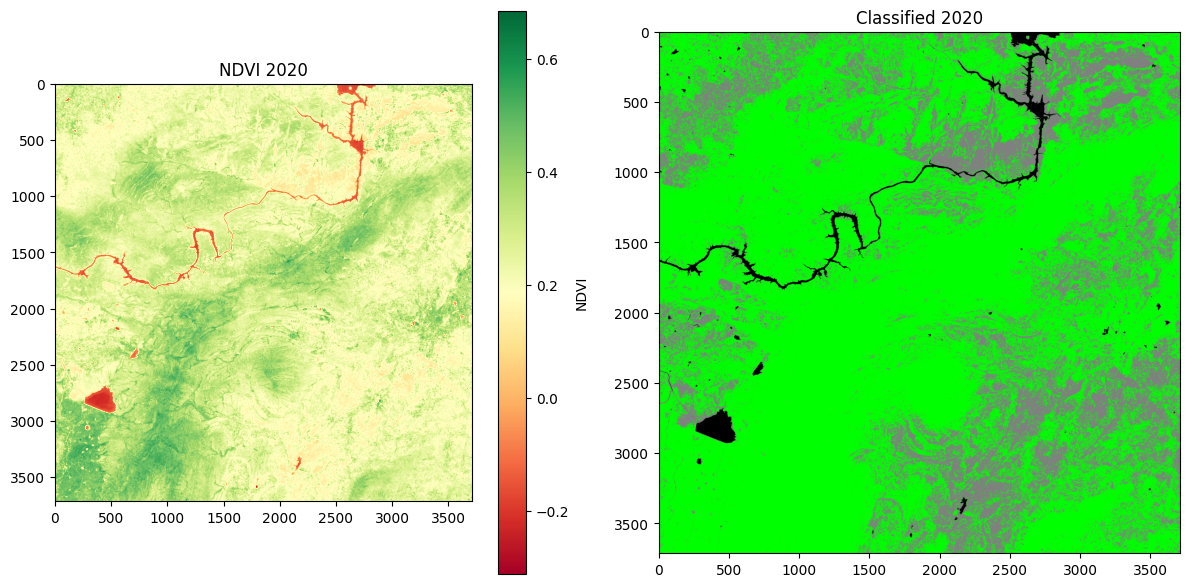

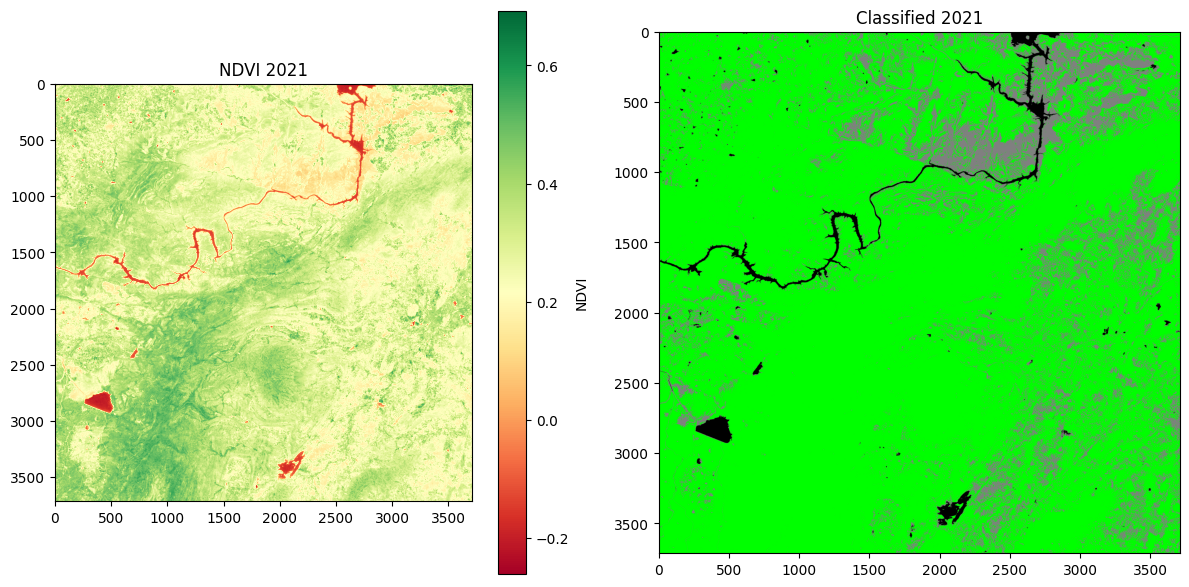

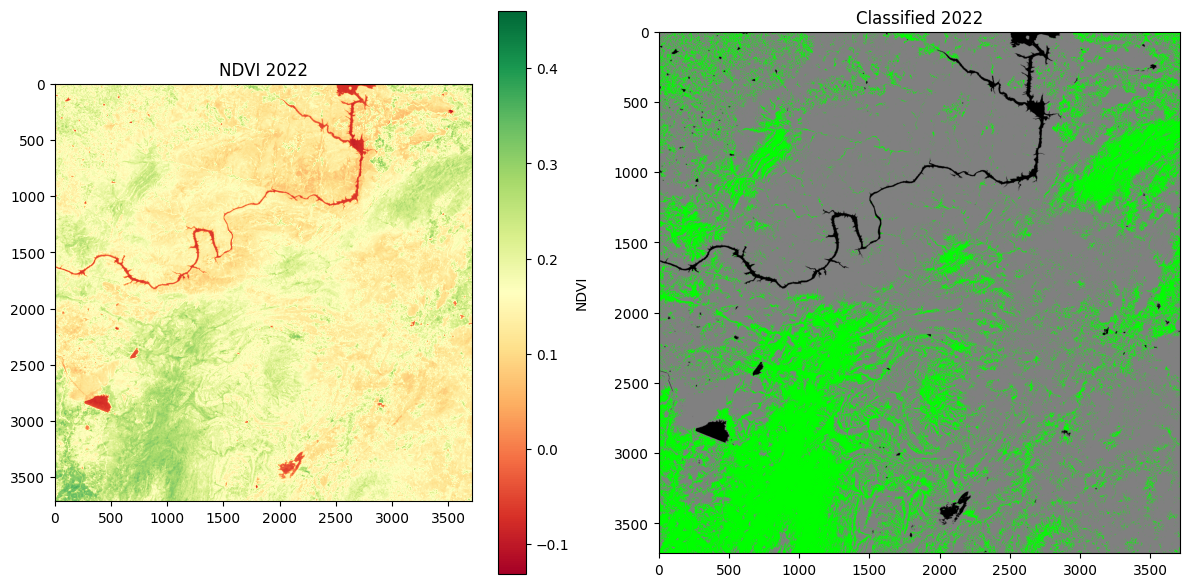

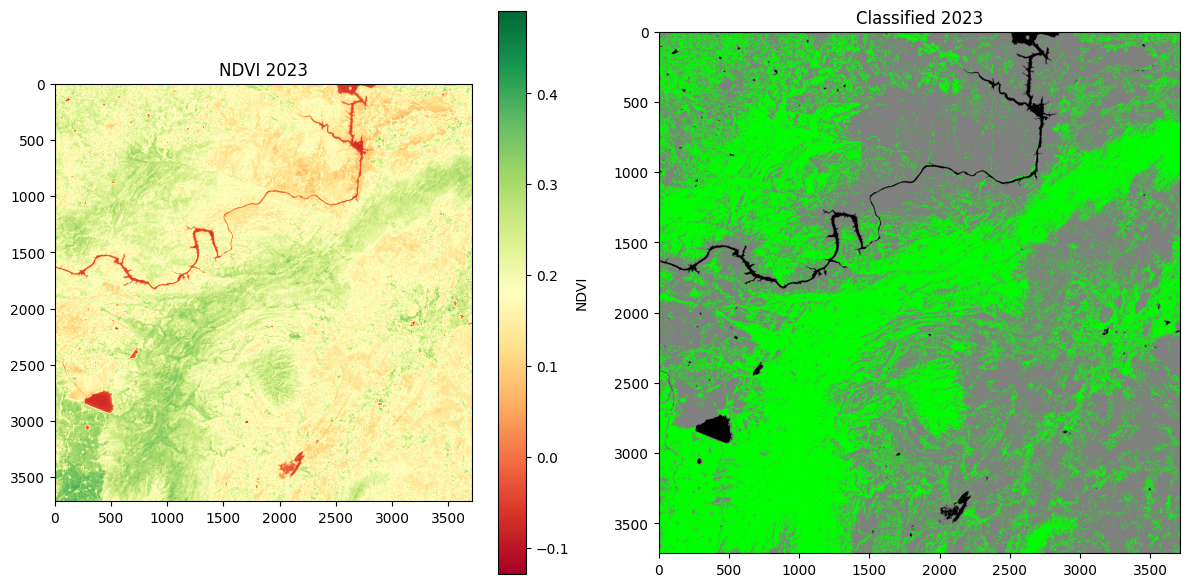

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# List of years
years = [2019, 2020, 2021, 2022, 2023]
ndvi_threshold = 0.2  # Threshold for vegetation classification

# Update the base path to your local directory
base_path = r"C:\Users\tanus\OneDrive\Documents\CODING\GDA\Nalla_Images"

# Loop through each year
for year in years:
    input_path = f"{base_path}\\NDVI_{year}.tif"  # Path to input image
    output_path = f"{base_path}\\NDVI_{year}_classified.png"  # Path to save the classified output

    # Open the NDVI image
    with rasterio.open(input_path) as src:
        ndvi = src.read(1)  # Read the NDVI band

    # Classify vegetation and barren land
    vegetation = ndvi > ndvi_threshold
    barren_land = (ndvi >= 0) & (ndvi <= ndvi_threshold)

    # Create an RGB output image
    output_image = np.zeros((ndvi.shape[0], ndvi.shape[1], 3), dtype=np.uint8)
    output_image[vegetation] = [0, 255, 0]  # Green for vegetation
    output_image[barren_land] = [128, 128, 128]  # Grey for barren land

    # Save the output image
    plt.imsave(output_path, output_image)

    # Display the input NDVI and classified output side-by-side
    plt.figure(figsize=(12, 6))
    
    # Input NDVI plot
    plt.subplot(1, 2, 1)
    plt.title(f"NDVI {year}")
    plt.imshow(ndvi, cmap="RdYlGn")
    plt.colorbar(label="NDVI")

    # Classified output plot
    plt.subplot(1, 2, 2)
    plt.title(f"Classified {year}")
    plt.imshow(output_image)

    plt.tight_layout()
    plt.show()


In [2]:
import rasterio
import numpy as np

# List of years and NDVI threshold
years = [2019, 2020, 2021, 2022, 2023]
ndvi_threshold = 0.2

# Path to the folder containing NDVI images
base_path = r"C:\Users\tanus\OneDrive\Documents\CODING\GDA\Nalla_Images"

# Loop through consecutive years to calculate changes
for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i + 1]

    # File paths for the two years
    path1 = f"{base_path}\\NDVI_{year1}.tif"
    path2 = f"{base_path}\\NDVI_{year2}.tif"

    # Read NDVI images for both years
    with rasterio.open(path1) as src1, rasterio.open(path2) as src2:
        ndvi1 = src1.read(1)
        ndvi2 = src2.read(1)

    # Calculate vegetation and barren land pixel counts
    veg1 = np.sum(ndvi1 > ndvi_threshold)
    veg2 = np.sum(ndvi2 > ndvi_threshold)
    barren1 = np.sum((ndvi1 >= 0) & (ndvi1 <= ndvi_threshold))
    barren2 = np.sum((ndvi2 >= 0) & (ndvi2 <= ndvi_threshold))

    # Total pixels in the image
    total_pixels = ndvi1.size

    # Calculate percentage change
    veg_change = ((veg2 - veg1) / total_pixels) * 100
    barren_change = ((barren2 - barren1) / total_pixels) * 100

    # Display the results
    print(f"Change from {year1} to {year2}:")
    print(f"  Vegetation: {veg_change:.2f}%")
    print(f"  Barren Land: {barren_change:.2f}%")


Change from 2019 to 2020:
  Vegetation: 33.39%
  Barren Land: -33.71%
Change from 2020 to 2021:
  Vegetation: 9.03%
  Barren Land: -9.14%
Change from 2021 to 2022:
  Vegetation: -57.85%
  Barren Land: 57.96%
Change from 2022 to 2023:
  Vegetation: 19.38%
  Barren Land: -19.22%
